## PEAQ Basic AND ADV

### Paint HUM Noise

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    basic_wav = pd.read_csv(proj/'peaq_basic.csv', usecols=['Hum SNR','score']) \
                    .rename(columns={'score':'basic_score'})
    adv_wav   = pd.read_csv(proj/'peaq_advance.csv',   usecols=['Hum SNR','score']) \
                    .rename(columns={'score':'adv_score'})
    basic_mp3 = pd.read_csv(proj/'peaq_basic.csv', usecols=['Hum SNR.1','score.4']) \
                    .rename(columns={'Hum SNR.1':'Hum SNR','score.4':'basic_score'})
    adv_mp3   = pd.read_csv(proj/'peaq_advance.csv',   usecols=['Hum SNR.1','score.4']) \
                    .rename(columns={'Hum SNR.1':'Hum SNR','score.4':'adv_score'})

    basic_wav['norm_basic'] = (basic_wav['basic_score'] + 4) / 4
    adv_wav  ['norm_adv']   = (adv_wav['adv_score']   + 4) / 4
    basic_mp3['norm_basic'] = (basic_mp3['basic_score'] + 4) / 4
    adv_mp3  ['norm_adv']   = (adv_mp3['adv_score']   + 4) / 4

    data.append({
        'name': name,
        'basic_wav': basic_wav[['Hum SNR','norm_basic']],
        'adv_wav':   adv_wav[['Hum SNR','norm_adv']],
        'basic_mp3': basic_mp3[['Hum SNR','norm_basic']],
        'adv_mp3':   adv_mp3[['Hum SNR','norm_adv']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('Hum SNR', as_index=False)[col].mean()

avg_basic_wav = average_curve([d['basic_wav'] for d in data], 'norm_basic')
avg_adv_wav   = average_curve([d['adv_wav']   for d in data], 'norm_adv')
avg_basic_mp3 = average_curve([d['basic_mp3'] for d in data], 'norm_basic')
avg_adv_mp3   = average_curve([d['adv_mp3']   for d in data], 'norm_adv')

data.append({
    'name': 'Average',
    'basic_wav': avg_basic_wav,
    'adv_wav':   avg_adv_wav,
    'basic_mp3': avg_basic_mp3,
    'adv_mp3':   avg_adv_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--',':','-.'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['basic_wav']['Hum SNR'], proj['basic_wav']['norm_basic'], label='Basic WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_wav']['Hum SNR'],   proj['adv_wav']['norm_adv'],     label='Adv WAV',   linestyle=next(styles), linewidth=2)
    ax.plot(proj['basic_mp3']['Hum SNR'], proj['basic_mp3']['norm_basic'], label='Basic MP3', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_mp3']['Hum SNR'],   proj['adv_mp3']['norm_adv'],     label='Adv MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('HUM Noise Level SNR (dB)', fontsize=12)

plt.tight_layout()
plt.show()


### Paint White Noise

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    	
    basic_wav = pd.read_csv(proj/'peaq_basic.csv', usecols=['WhiteNoise SNR','score.1']) \
                    .rename(columns={'score.1':'basic_score'})
    adv_wav   = pd.read_csv(proj/'peaq_advance.csv',   usecols=['WhiteNoise SNR','score.1']) \
                    .rename(columns={'score.1':'adv_score'})
    basic_mp3 = pd.read_csv(proj/'peaq_basic.csv', usecols=['WhiteNoise SNR.1','score.5']) \
                    .rename(columns={'WhiteNoise SNR.1':'WhiteNoise SNR','score.5':'basic_score'})
    adv_mp3   = pd.read_csv(proj/'peaq_advance.csv',   usecols=['WhiteNoise SNR.1','score.5']) \
                    .rename(columns={'WhiteNoise SNR.1':'WhiteNoise SNR','score.5':'adv_score'})

    basic_wav['norm_basic'] = (basic_wav['basic_score'] + 4) / 4
    adv_wav  ['norm_adv']   = (adv_wav['adv_score']   + 4) / 4
    basic_mp3['norm_basic'] = (basic_mp3['basic_score'] + 4) / 4
    adv_mp3  ['norm_adv']   = (adv_mp3['adv_score']   + 4) / 4

    data.append({
        'name': name,
        'basic_wav': basic_wav[['WhiteNoise SNR','norm_basic']],
        'adv_wav':   adv_wav[['WhiteNoise SNR','norm_adv']],
        'basic_mp3': basic_mp3[['WhiteNoise SNR','norm_basic']],
        'adv_mp3':   adv_mp3[['WhiteNoise SNR','norm_adv']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('WhiteNoise SNR', as_index=False)[col].mean()

avg_basic_wav = average_curve([d['basic_wav'] for d in data], 'norm_basic')
avg_adv_wav   = average_curve([d['adv_wav']   for d in data], 'norm_adv')
avg_basic_mp3 = average_curve([d['basic_mp3'] for d in data], 'norm_basic')
avg_adv_mp3   = average_curve([d['adv_mp3']   for d in data], 'norm_adv')

data.append({
    'name': 'Average',
    'basic_wav': avg_basic_wav,
    'adv_wav':   avg_adv_wav,
    'basic_mp3': avg_basic_mp3,
    'adv_mp3':   avg_adv_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--',':','-.'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['basic_wav']['WhiteNoise SNR'], proj['basic_wav']['norm_basic'], label='Basic WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_wav']['WhiteNoise SNR'],   proj['adv_wav']['norm_adv'],     label='Adv WAV',   linestyle=next(styles), linewidth=2)
    ax.plot(proj['basic_mp3']['WhiteNoise SNR'], proj['basic_mp3']['norm_basic'], label='Basic MP3', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_mp3']['WhiteNoise SNR'],   proj['adv_mp3']['norm_adv'],     label='Adv MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('White Noise Level SNR (dB)', fontsize=12)

plt.tight_layout()
plt.show()


### Paint Clipping

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    		
    basic_wav = pd.read_csv(proj/'peaq_basic.csv', usecols=['Clipping Percentage(%)','score.2']) \
                    .rename(columns={'score.2':'basic_score'})
    adv_wav   = pd.read_csv(proj/'peaq_advance.csv',   usecols=['Clipping Percentage(%)','score.2']) \
                    .rename(columns={'score.2':'adv_score'})
    basic_mp3 = pd.read_csv(proj/'peaq_basic.csv', usecols=['Clipping Percentage(%).1','score.6']) \
                    .rename(columns={'Clipping Percentage(%).1':'Clipping Percentage(%)','score.6':'basic_score'})
    adv_mp3   = pd.read_csv(proj/'peaq_advance.csv',usecols=['Clipping Percentage(%).1','score.6']) \
                    .rename(columns={'Clipping Percentage(%).1':'Clipping Percentage(%)','score.6':'adv_score'})

    basic_wav['norm_basic'] = (basic_wav['basic_score'] + 4) / 4
    adv_wav  ['norm_adv']   = (adv_wav['adv_score']   + 4) / 4
    basic_mp3['norm_basic'] = (basic_mp3['basic_score'] + 4) / 4
    adv_mp3  ['norm_adv']   = (adv_mp3['adv_score']   + 4) / 4

    data.append({
        'name': name,
        'basic_wav': basic_wav[['Clipping Percentage(%)','norm_basic']],
        'adv_wav':   adv_wav[['Clipping Percentage(%)','norm_adv']],
        'basic_mp3': basic_mp3[['Clipping Percentage(%)','norm_basic']],
        'adv_mp3':   adv_mp3[['Clipping Percentage(%)','norm_adv']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('Clipping Percentage(%)', as_index=False)[col].mean()

avg_basic_wav = average_curve([d['basic_wav'] for d in data], 'norm_basic')
avg_adv_wav   = average_curve([d['adv_wav']   for d in data], 'norm_adv')
avg_basic_mp3 = average_curve([d['basic_mp3'] for d in data], 'norm_basic')
avg_adv_mp3   = average_curve([d['adv_mp3']   for d in data], 'norm_adv')

data.append({
    'name': 'Average',
    'basic_wav': avg_basic_wav,
    'adv_wav':   avg_adv_wav,
    'basic_mp3': avg_basic_mp3,
    'adv_mp3':   avg_adv_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--',':','-.'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['basic_wav']['Clipping Percentage(%)'], proj['basic_wav']['norm_basic'], label='Basic WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_wav']['Clipping Percentage(%)'],   proj['adv_wav']['norm_adv'],     label='Adv WAV',   linestyle=next(styles), linewidth=2)
    ax.plot(proj['basic_mp3']['Clipping Percentage(%)'], proj['basic_mp3']['norm_basic'], label='Basic MP3', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_mp3']['Clipping Percentage(%)'],   proj['adv_mp3']['norm_adv'],     label='Adv MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('Clipping Percentage(%)', fontsize=12)

plt.tight_layout()
plt.show()


### Paint Dropout

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    basic_wav = pd.read_csv(proj/'peaq_basic.csv', usecols=['Dropout Num','score.3']) \
                    .rename(columns={'score.3':'basic_score'})
    adv_wav   = pd.read_csv(proj/'peaq_advance.csv',   usecols=['Dropout Num','score.3']) \
                    .rename(columns={'score.3':'adv_score'})
    basic_mp3 = pd.read_csv(proj/'peaq_basic.csv', usecols=['Dropout Num.1','score.7']) \
                    .rename(columns={'Dropout Num.1':'Dropout Num','score.7':'basic_score'})
    adv_mp3   = pd.read_csv(proj/'peaq_advance.csv',usecols=['Dropout Num.1','score.7']) \
                    .rename(columns={'Dropout Num.1':'Dropout Num','score.7':'adv_score'})

    basic_wav['norm_basic'] = (basic_wav['basic_score'] + 4) / 4
    adv_wav  ['norm_adv']   = (adv_wav['adv_score']   + 4) / 4
    basic_mp3['norm_basic'] = (basic_mp3['basic_score'] + 4) / 4
    adv_mp3  ['norm_adv']   = (adv_mp3['adv_score']   + 4) / 4

    data.append({
        'name': name,
        'basic_wav': basic_wav[['Dropout Num','norm_basic']],
        'adv_wav':   adv_wav[['Dropout Num','norm_adv']],
        'basic_mp3': basic_mp3[['Dropout Num','norm_basic']],
        'adv_mp3':   adv_mp3[['Dropout Num','norm_adv']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('Dropout Num', as_index=False)[col].mean()

avg_basic_wav = average_curve([d['basic_wav'] for d in data], 'norm_basic')
avg_adv_wav   = average_curve([d['adv_wav']   for d in data], 'norm_adv')
avg_basic_mp3 = average_curve([d['basic_mp3'] for d in data], 'norm_basic')
avg_adv_mp3   = average_curve([d['adv_mp3']   for d in data], 'norm_adv')

data.append({
    'name': 'Average',
    'basic_wav': avg_basic_wav,
    'adv_wav':   avg_adv_wav,
    'basic_mp3': avg_basic_mp3,
    'adv_mp3':   avg_adv_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--',':','-.'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['basic_wav']['Dropout Num'], proj['basic_wav']['norm_basic'], label='Basic WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_wav']['Dropout Num'],   proj['adv_wav']['norm_adv'],     label='Adv WAV',   linestyle=next(styles), linewidth=2)
    ax.plot(proj['basic_mp3']['Dropout Num'], proj['basic_mp3']['norm_basic'], label='Basic MP3', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_mp3']['Dropout Num'],   proj['adv_mp3']['norm_adv'],     label='Adv MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('Dropout Number Occurence ', fontsize=12)

plt.tight_layout()
plt.show()


### VISQOL and HAAQI

### Paint HUM Noise

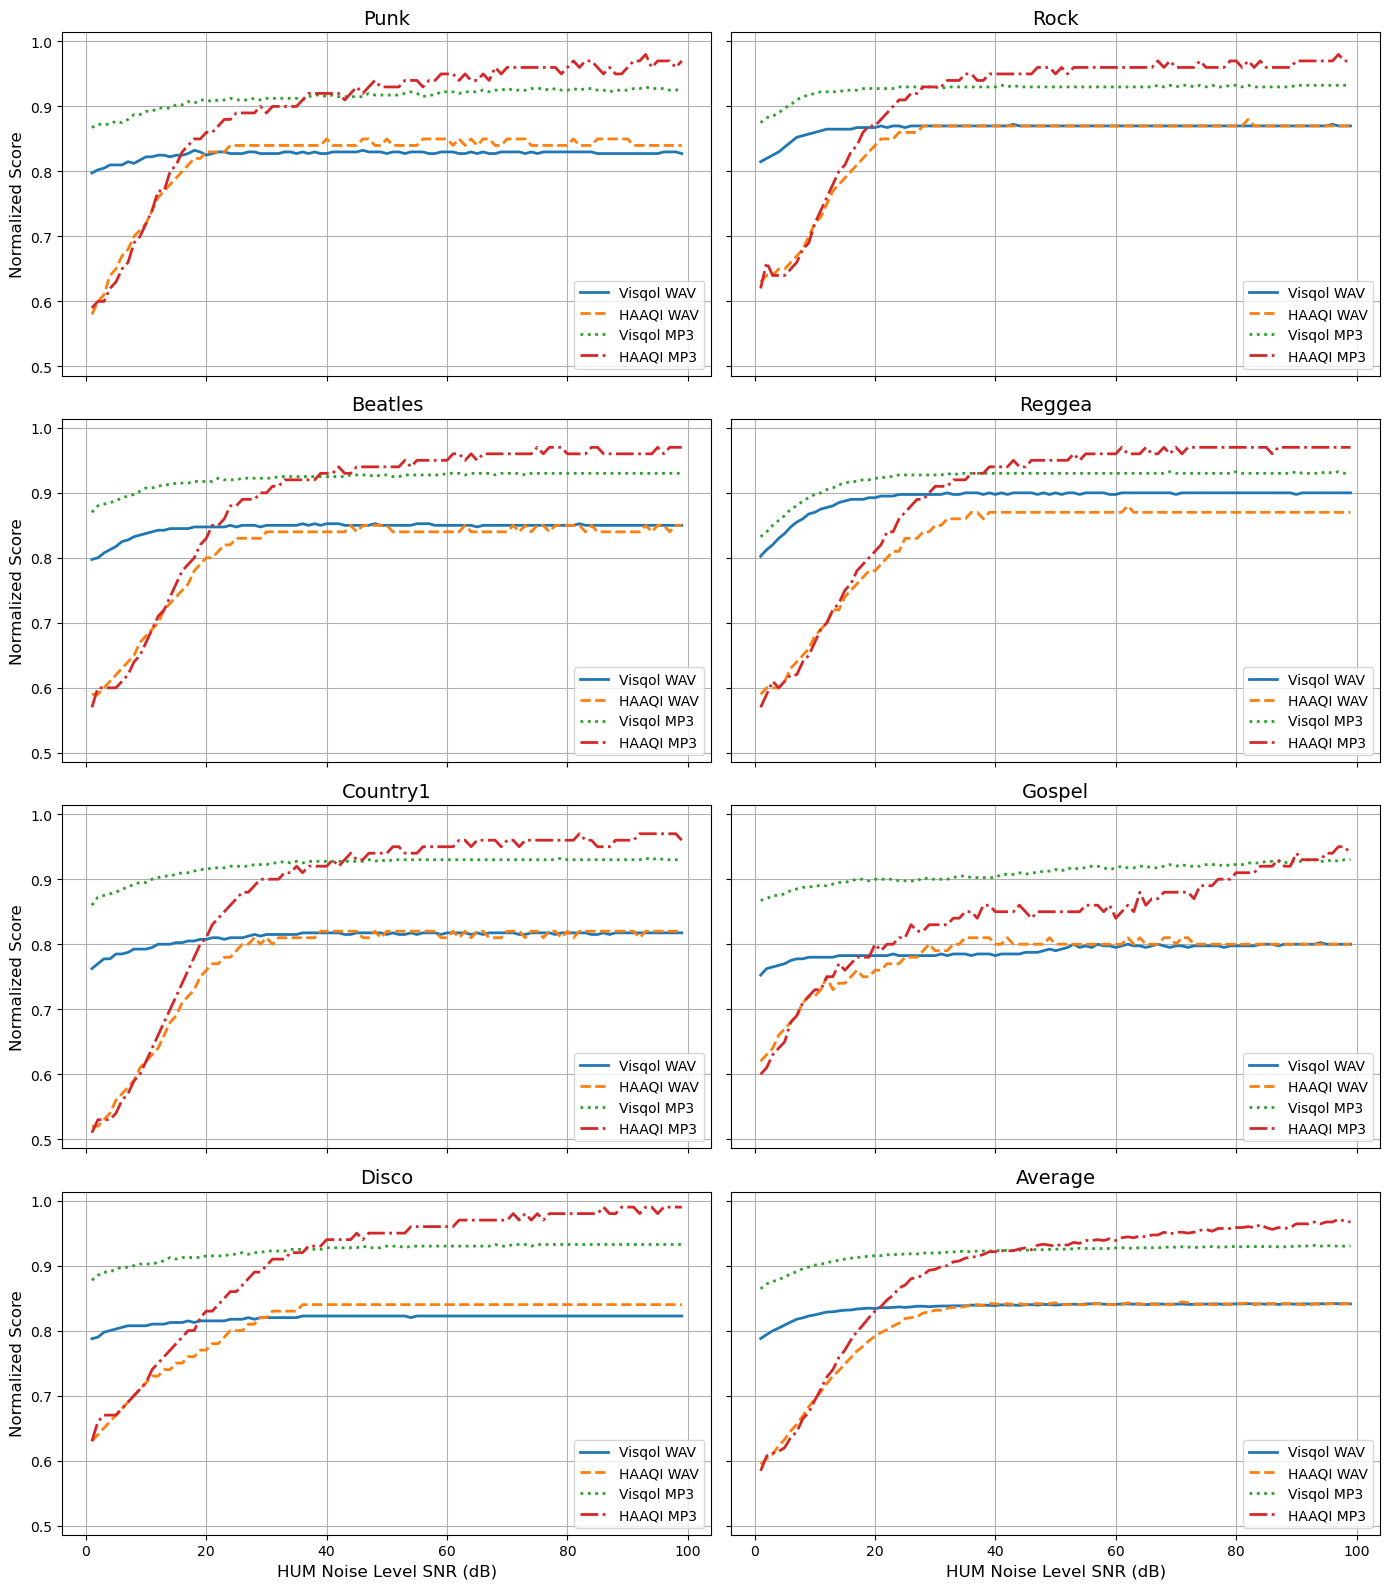

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    visqol_wav = pd.read_csv(proj/'visqol.csv', usecols=['Hum SNR','score']) \
                    .rename(columns={'score':'basic_score'})
    haqi_wav   = pd.read_csv(proj/'haaqi.csv',   usecols=['HumNoise SNR','score']) \
                    .rename(columns={'HumNoise SNR':'Hum SNR','score':'adv_score'})
    visqol_mp3 = pd.read_csv(proj/'visqol.csv', usecols=['Hum SNR.1','score.4']) \
                    .rename(columns={'Hum SNR.1':'Hum SNR','score.4':'basic_score'})
    haqi_mp3   = pd.read_csv(proj/'haaqi.csv',   usecols=['HumNoise SNR.1','score.4']) \
                    .rename(columns={'HumNoise SNR.1':'Hum SNR','score.4':'adv_score'})

    visqol_wav['norm_basic'] = (visqol_wav['basic_score'] + 4) / 4
    haqi_wav  ['norm_adv']   = haqi_wav['adv_score']
    visqol_mp3['norm_basic'] = (visqol_mp3['basic_score'] + 4) / 4
    haqi_mp3  ['norm_adv']   = haqi_mp3['adv_score']

    data.append({
        'name': name,
        'basic_wav': visqol_wav[['Hum SNR','norm_basic']],
        'adv_wav':   haqi_wav[['Hum SNR','norm_adv']],
        'basic_mp3': visqol_mp3[['Hum SNR','norm_basic']],
        'adv_mp3':   haqi_mp3[['Hum SNR','norm_adv']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('Hum SNR', as_index=False)[col].mean()

avg_basic_wav = average_curve([d['basic_wav'] for d in data], 'norm_basic')
avg_adv_wav   = average_curve([d['adv_wav']   for d in data], 'norm_adv')
avg_basic_mp3 = average_curve([d['basic_mp3'] for d in data], 'norm_basic')
avg_adv_mp3   = average_curve([d['adv_mp3']   for d in data], 'norm_adv')

data.append({
    'name': 'Average',
    'basic_wav': avg_basic_wav,
    'adv_wav':   avg_adv_wav,
    'basic_mp3': avg_basic_mp3,
    'adv_mp3':   avg_adv_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--',':','-.'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['basic_wav']['Hum SNR'], proj['basic_wav']['norm_basic'], label='Visqol WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_wav']['Hum SNR'],   proj['adv_wav']['norm_adv'],     label='HAAQI WAV',   linestyle=next(styles), linewidth=2)
    ax.plot(proj['basic_mp3']['Hum SNR'], proj['basic_mp3']['norm_basic'], label='Visqol MP3', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_mp3']['Hum SNR'],   proj['adv_mp3']['norm_adv'],     label='HAAQI MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('HUM Noise Level SNR (dB)', fontsize=12)

plt.tight_layout()
plt.show()


### Paint White Noise

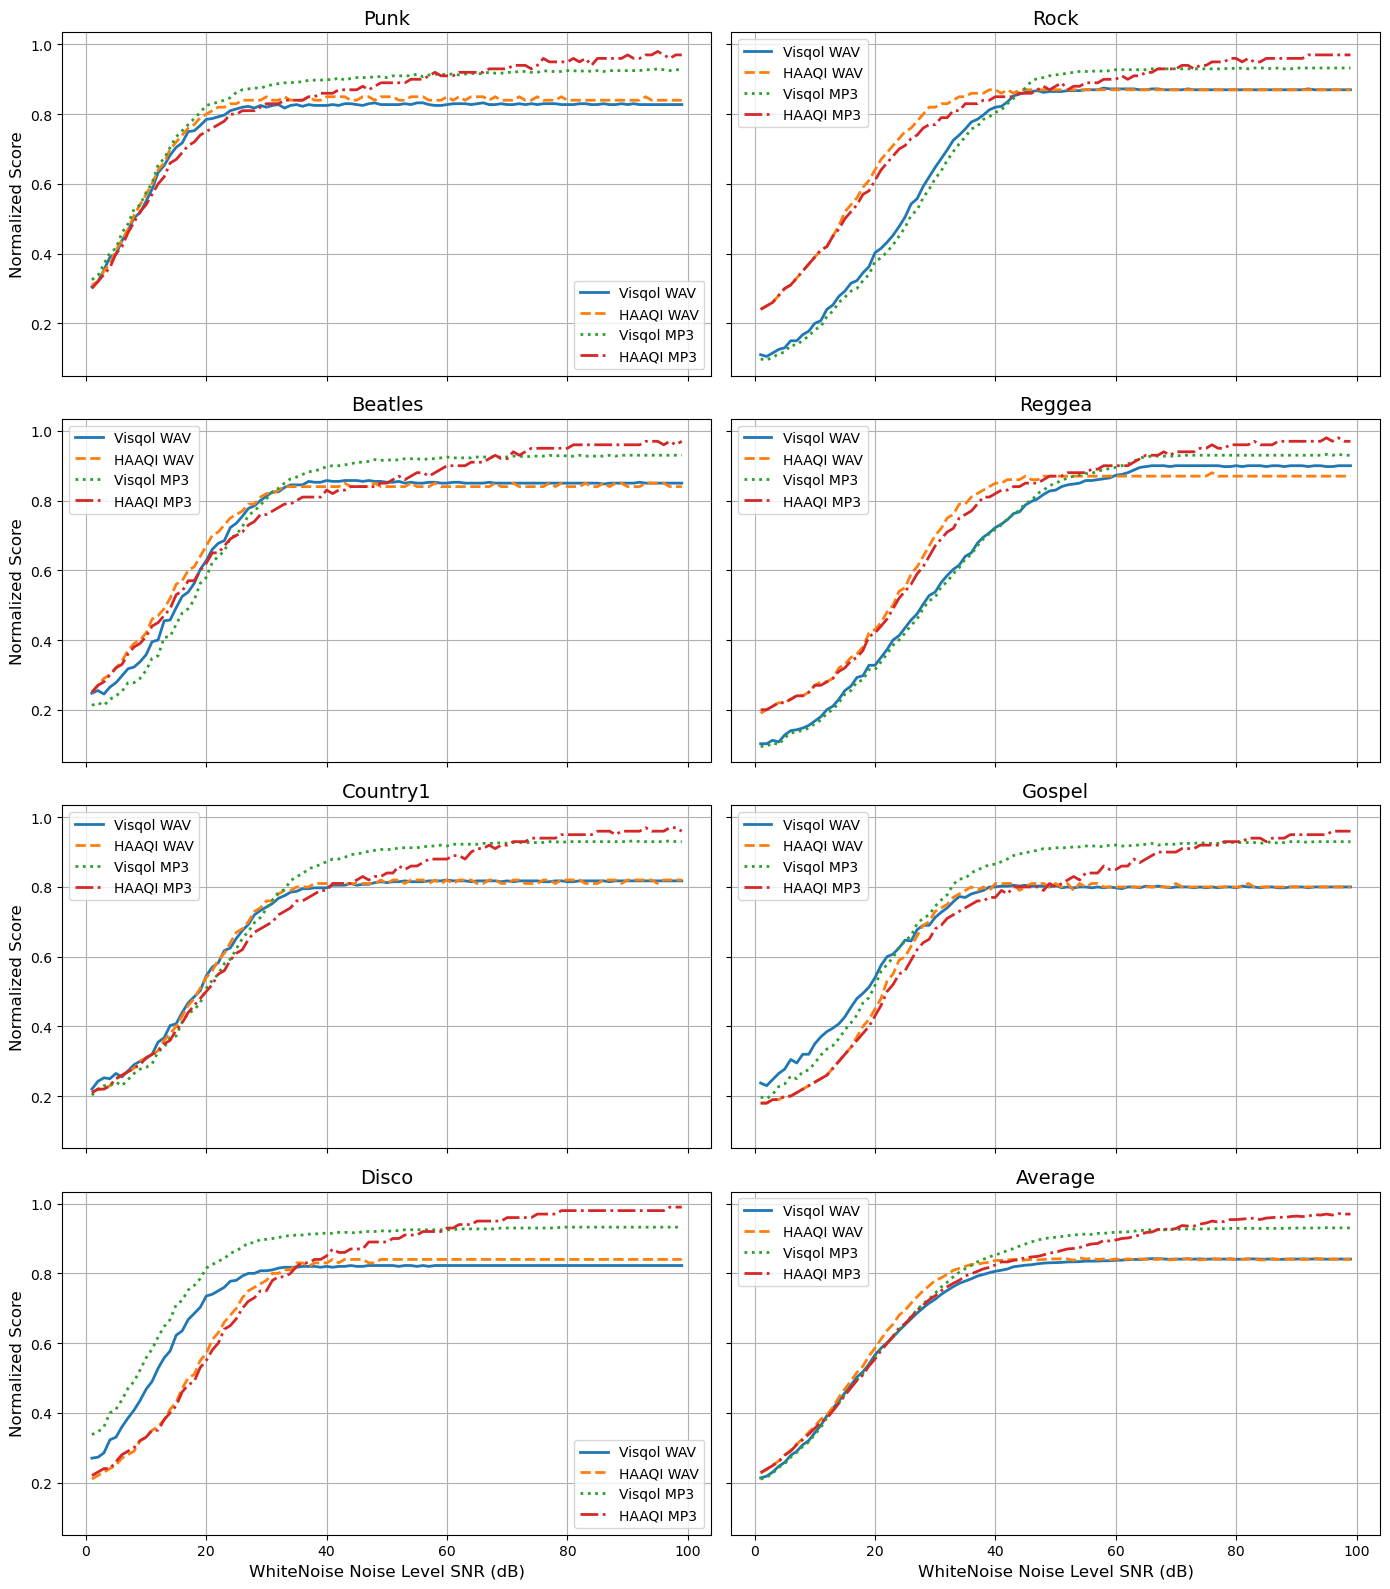

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    visqol_wav = pd.read_csv(proj/'visqol.csv', usecols=['WhiteNoise SNR','score.1']) \
                    .rename(columns={'score.1':'basic_score'})
    haqi_wav   = pd.read_csv(proj/'haaqi.csv', usecols=['WhiteNoise SNR','score.1']) \
                    .rename(columns={'score.1':'adv_score'})
    visqol_mp3 = pd.read_csv(proj/'visqol.csv', usecols=['WhiteNoise SNR.1','score.5']) \
                    .rename(columns={'WhiteNoise SNR.1':'WhiteNoise SNR','score.5':'basic_score'})
    haqi_mp3   = pd.read_csv(proj/'haaqi.csv',   usecols=['WhiteNoise SNR.1','score.5']) \
                    .rename(columns={'WhiteNoise SNR.1':'WhiteNoise SNR','score.5':'adv_score'})
    
    visqol_wav['norm_basic'] = (visqol_wav['basic_score'] + 4) / 4
    haqi_wav  ['norm_adv']   = haqi_wav['adv_score']
    visqol_mp3['norm_basic'] = (visqol_mp3['basic_score'] + 4) / 4
    haqi_mp3  ['norm_adv']   = haqi_mp3['adv_score']

    data.append({
        'name': name,
        'basic_wav': visqol_wav[['WhiteNoise SNR','norm_basic']],
        'adv_wav':   haqi_wav[['WhiteNoise SNR','norm_adv']],
        'basic_mp3': visqol_mp3[['WhiteNoise SNR','norm_basic']],
        'adv_mp3':   haqi_mp3[['WhiteNoise SNR','norm_adv']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('WhiteNoise SNR', as_index=False)[col].mean()

avg_basic_wav = average_curve([d['basic_wav'] for d in data], 'norm_basic')
avg_adv_wav   = average_curve([d['adv_wav']   for d in data], 'norm_adv')
avg_basic_mp3 = average_curve([d['basic_mp3'] for d in data], 'norm_basic')
avg_adv_mp3   = average_curve([d['adv_mp3']   for d in data], 'norm_adv')

data.append({
    'name': 'Average',
    'basic_wav': avg_basic_wav,
    'adv_wav':   avg_adv_wav,
    'basic_mp3': avg_basic_mp3,
    'adv_mp3':   avg_adv_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--',':','-.'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['basic_wav']['WhiteNoise SNR'], proj['basic_wav']['norm_basic'], label='Visqol WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_wav']['WhiteNoise SNR'],   proj['adv_wav']['norm_adv'],     label='HAAQI WAV',   linestyle=next(styles), linewidth=2)
    ax.plot(proj['basic_mp3']['WhiteNoise SNR'], proj['basic_mp3']['norm_basic'], label='Visqol MP3', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_mp3']['WhiteNoise SNR'],   proj['adv_mp3']['norm_adv'],     label='HAAQI MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('WhiteNoise Noise Level SNR (dB)', fontsize=12)

plt.tight_layout()
plt.show()


### Paint Clipping

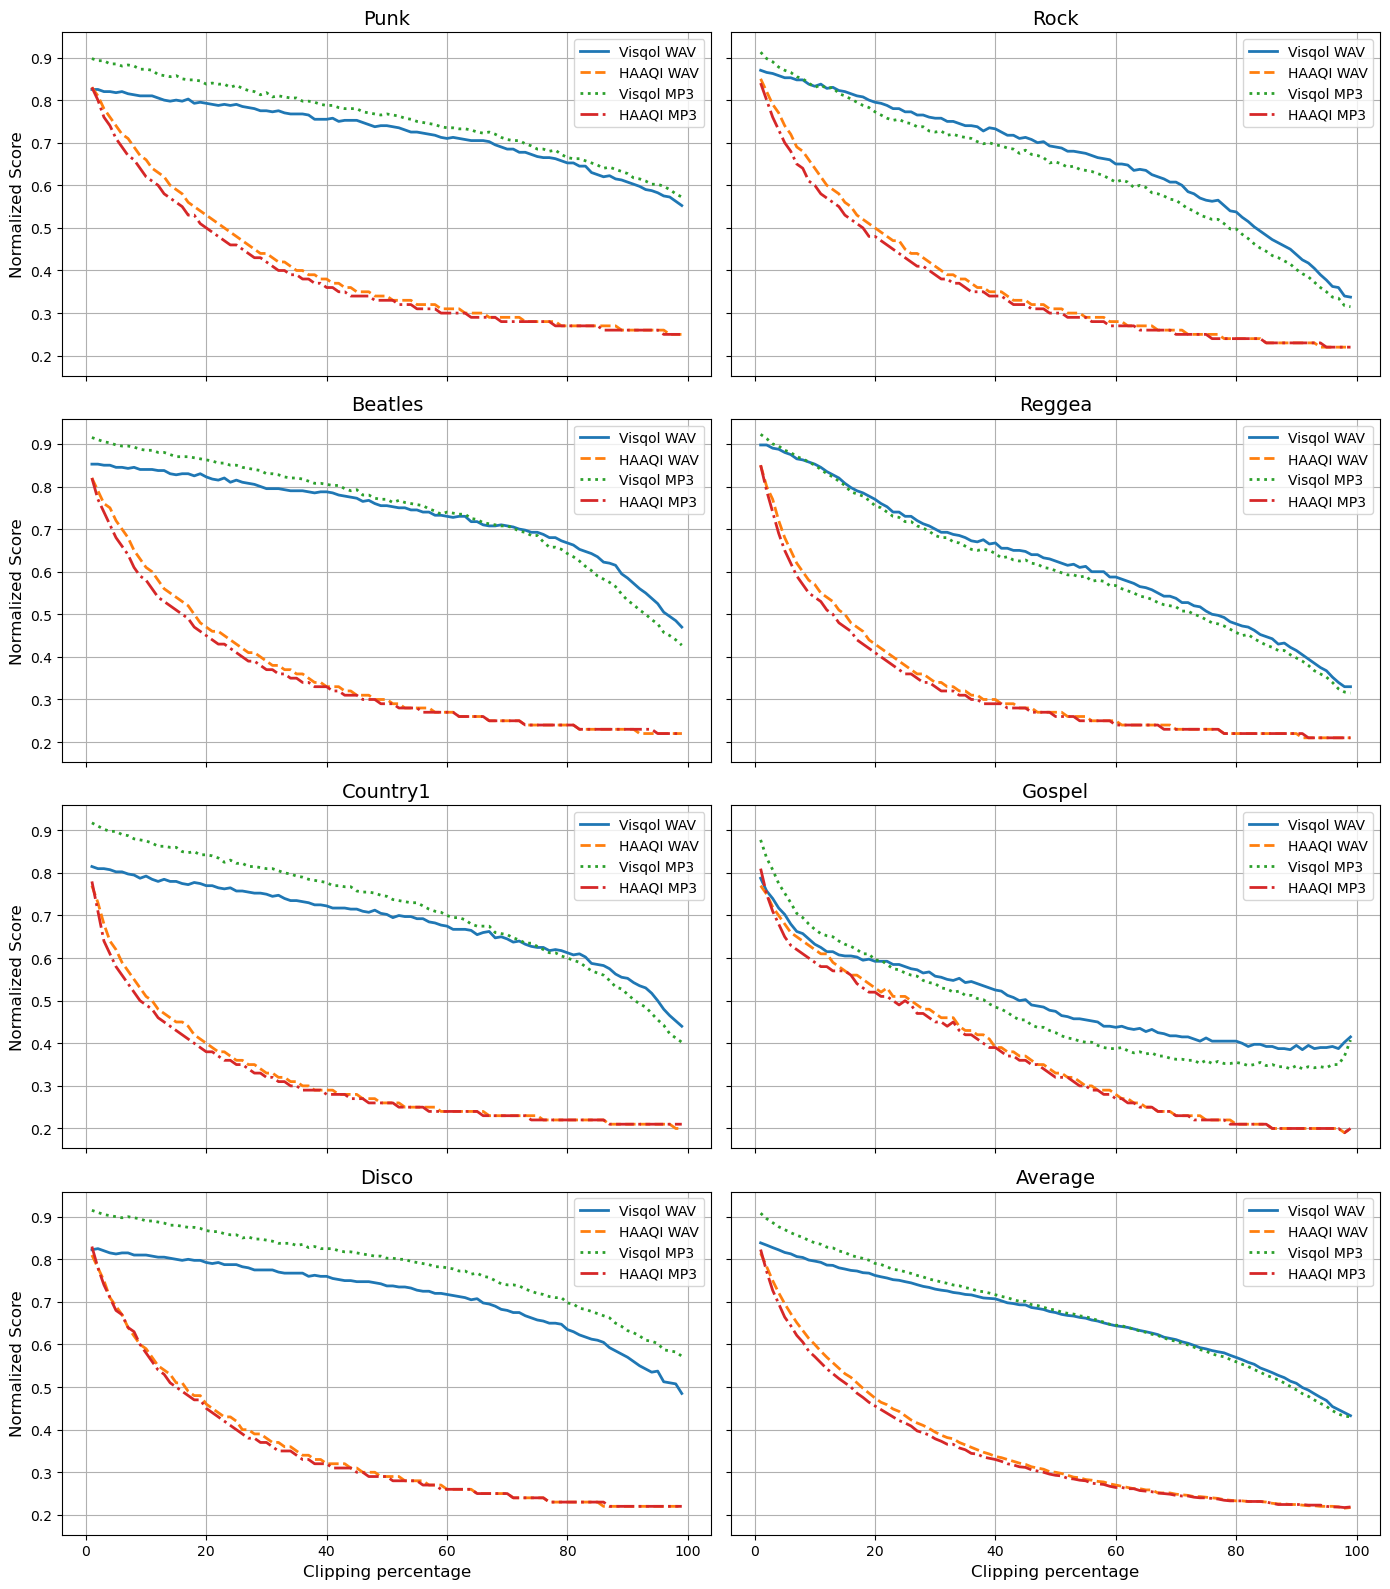

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    visqol_wav = pd.read_csv(proj/'visqol.csv', usecols=['Clipping Percentage(%)','score.2']) \
                    .rename(columns={'score.2':'basic_score'})
    haqi_wav   = pd.read_csv(proj/'haaqi.csv', usecols=['Clipping Percentage(%)','score.2']) \
                    .rename(columns={'score.2':'adv_score'})
    visqol_mp3 = pd.read_csv(proj/'visqol.csv', usecols=['Clipping Percentage(%).1','score.6']) \
                    .rename(columns={'Clipping Percentage(%).1':'Clipping Percentage(%)','score.6':'basic_score'})
    haqi_mp3   = pd.read_csv(proj/'haaqi.csv',   usecols=['Clipping Percentage(%).1','score.6']) \
                    .rename(columns={'Clipping Percentage(%).1':'Clipping Percentage(%)','score.6':'adv_score'})

    visqol_wav['norm_basic'] = (visqol_wav['basic_score'] + 4) / 4
    haqi_wav  ['norm_adv']   = haqi_wav['adv_score']
    visqol_mp3['norm_basic'] = (visqol_mp3['basic_score'] + 4) / 4
    haqi_mp3  ['norm_adv']   = haqi_mp3['adv_score']

    data.append({
        'name': name,
        'basic_wav': visqol_wav[['Clipping Percentage(%)','norm_basic']],
        'adv_wav':   haqi_wav[['Clipping Percentage(%)','norm_adv']],
        'basic_mp3': visqol_mp3[['Clipping Percentage(%)','norm_basic']],
        'adv_mp3':   haqi_mp3[['Clipping Percentage(%)','norm_adv']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('Clipping Percentage(%)', as_index=False)[col].mean()

avg_basic_wav = average_curve([d['basic_wav'] for d in data], 'norm_basic')
avg_adv_wav   = average_curve([d['adv_wav']   for d in data], 'norm_adv')
avg_basic_mp3 = average_curve([d['basic_mp3'] for d in data], 'norm_basic')
avg_adv_mp3   = average_curve([d['adv_mp3']   for d in data], 'norm_adv')

data.append({
    'name': 'Average',
    'basic_wav': avg_basic_wav,
    'adv_wav':   avg_adv_wav,
    'basic_mp3': avg_basic_mp3,
    'adv_mp3':   avg_adv_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--',':','-.'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['basic_wav']['Clipping Percentage(%)'], proj['basic_wav']['norm_basic'], label='Visqol WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_wav']['Clipping Percentage(%)'],   proj['adv_wav']['norm_adv'],     label='HAAQI WAV',   linestyle=next(styles), linewidth=2)
    ax.plot(proj['basic_mp3']['Clipping Percentage(%)'], proj['basic_mp3']['norm_basic'], label='Visqol MP3', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_mp3']['Clipping Percentage(%)'],   proj['adv_mp3']['norm_adv'],     label='HAAQI MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('Clipping percentage', fontsize=12)

plt.tight_layout()
plt.show()


### Paint Dropout

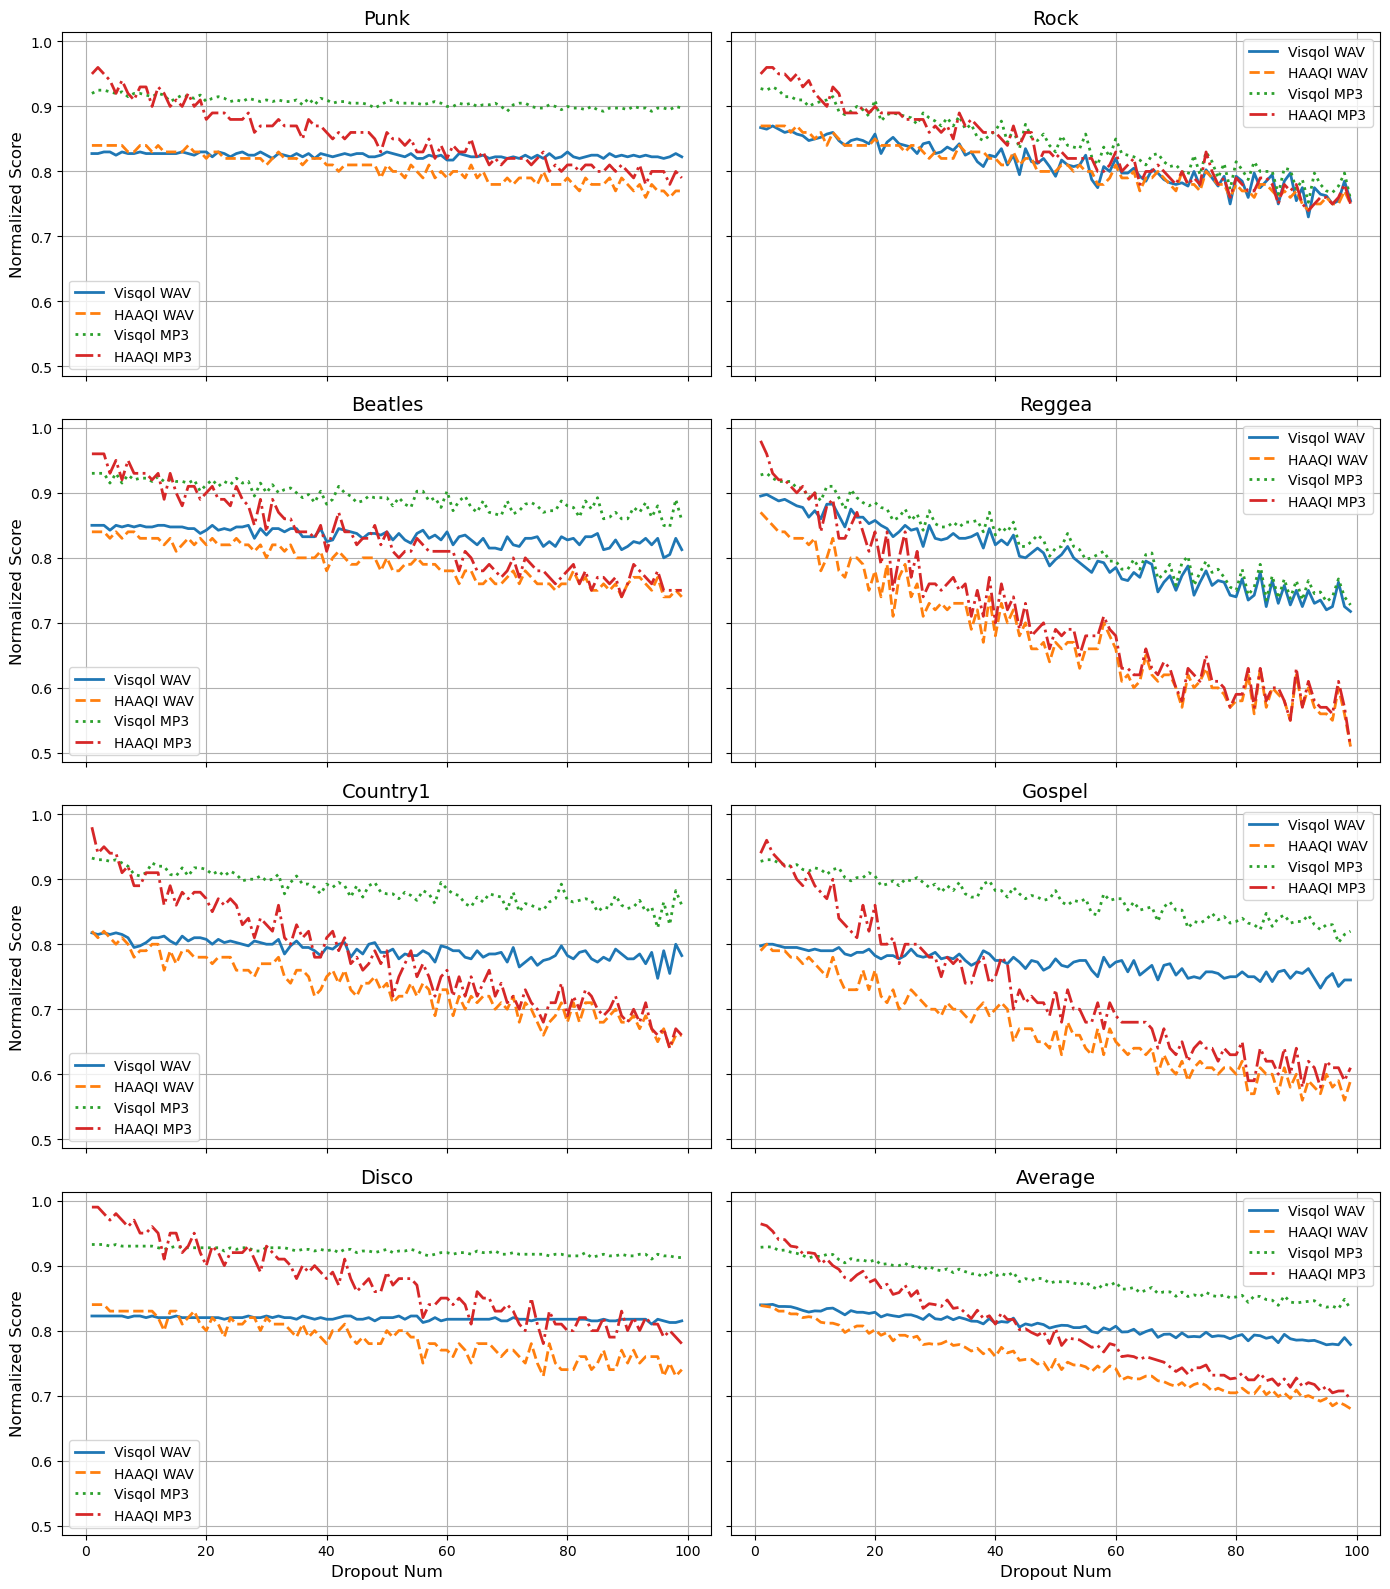

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    visqol_wav = pd.read_csv(proj/'visqol.csv', usecols=['Dropout Num','score.3']) \
                    .rename(columns={'score.3':'basic_score'})
    haqi_wav   = pd.read_csv(proj/'haaqi.csv', usecols=['Dropout Num','score.3']) \
                    .rename(columns={'score.3':'adv_score'})
    visqol_mp3 = pd.read_csv(proj/'visqol.csv', usecols=['Dropout Num.1','score.7']) \
                    .rename(columns={'Dropout Num.1':'Dropout Num','score.7':'basic_score'})
    haqi_mp3   = pd.read_csv(proj/'haaqi.csv',   usecols=['Dropout Num.1','score.7']) \
                    .rename(columns={'Dropout Num.1':'Dropout Num','score.7':'adv_score'}) 

    visqol_wav['norm_basic'] = (visqol_wav['basic_score'] + 4) / 4
    haqi_wav  ['norm_adv']   = haqi_wav['adv_score']
    visqol_mp3['norm_basic'] = (visqol_mp3['basic_score'] + 4) / 4
    haqi_mp3  ['norm_adv']   = haqi_mp3['adv_score']

    data.append({
        'name': name,
        'basic_wav': visqol_wav[['Dropout Num','norm_basic']],
        'adv_wav':   haqi_wav[['Dropout Num','norm_adv']],
        'basic_mp3': visqol_mp3[['Dropout Num','norm_basic']],
        'adv_mp3':   haqi_mp3[['Dropout Num','norm_adv']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('Dropout Num', as_index=False)[col].mean()

avg_basic_wav = average_curve([d['basic_wav'] for d in data], 'norm_basic')
avg_adv_wav   = average_curve([d['adv_wav']   for d in data], 'norm_adv')
avg_basic_mp3 = average_curve([d['basic_mp3'] for d in data], 'norm_basic')
avg_adv_mp3   = average_curve([d['adv_mp3']   for d in data], 'norm_adv')

data.append({
    'name': 'Average',
    'basic_wav': avg_basic_wav,
    'adv_wav':   avg_adv_wav,
    'basic_mp3': avg_basic_mp3,
    'adv_mp3':   avg_adv_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--',':','-.'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['basic_wav']['Dropout Num'], proj['basic_wav']['norm_basic'], label='Visqol WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_wav']['Dropout Num'],   proj['adv_wav']['norm_adv'],     label='HAAQI WAV',   linestyle=next(styles), linewidth=2)
    ax.plot(proj['basic_mp3']['Dropout Num'], proj['basic_mp3']['norm_basic'], label='Visqol MP3', linestyle=next(styles), linewidth=2)
    ax.plot(proj['adv_mp3']['Dropout Num'],   proj['adv_mp3']['norm_adv'],     label='HAAQI MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('Dropout Num', fontsize=12)

plt.tight_layout()
plt.show()


### PEMO 

In [64]:
import numpy as np

base_dir = "/home/codecrack/Jnotebook/48k_16bit"

# List all first-layer folders
first_layer_dirs = [
    os.path.join(base_dir, name) + '/' for name in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, name))
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    data_point_alterHN_PEMO_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/HN_PEMOODG.csv', delimiter=',')
    data_point_alterHN_PEMO_mp3_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/HN_PEMOODG_MP3.csv', delimiter=',')
    df_HN_PEMO_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,100,1), 'score': data_point_alterHN_PEMO_48k_16bit})
    df_HN_PEMO_48k_16bit = df_HN_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_HN_PEMO_mp3_48k_16bit = pd.DataFrame({'Hum SNR': np.arange(1,100,1), 'score': data_point_alterHN_PEMO_mp3_48k_16bit})
    df_HN_PEMO_mp3_48k_16bit = df_HN_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    data_point_alterWN_PEMO_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/WN_PEMOODG.csv', delimiter=',')
    data_point_alterWN_PEMO_mp3_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/WN_PEMOODG_MP3.csv', delimiter=',')
    df_WN_PEMO_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_PEMO_48k_16bit})
    df_WN_PEMO_48k_16bit = df_WN_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_WN_PEMO_mp3_48k_16bit = pd.DataFrame({'WhiteNoise SNR': np.arange(1,100,1), 'score': data_point_alterWN_PEMO_mp3_48k_16bit})
    df_WN_PEMO_mp3_48k_16bit = df_WN_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    data_point_alterCP_PEMO_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/CP_PEMOODG.csv', delimiter=',')
    data_point_alterCP_PEMO_mp3_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/CP_PEMOODG_MP3.csv', delimiter=',')
    df_CP_PEMO_48k_16bit = pd.DataFrame({'Clipping Percentage': np.arange(1,100,1), 'score': data_point_alterCP_PEMO_48k_16bit})
    df_CP_PEMO_48k_16bit = df_CP_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_CP_PEMO_mp3_48k_16bit = pd.DataFrame({'Clipping Percentage': np.arange(1,100,1), 'score': data_point_alterCP_PEMO_mp3_48k_16bit})
    df_CP_PEMO_mp3_48k_16bit = df_CP_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    data_point_alterDO_PEMO_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/DO_PEMOODG.csv', delimiter=',')
    data_point_alterDO_PEMO_mp3_48k_16bit = np.loadtxt(f'{Mixing_Path_48k_16bit}/PEMO/DO_PEMOODG_MP3.csv', delimiter=',')
    df_DO_PEMO_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_PEMO_48k_16bit})
    df_DO_PEMO_48k_16bit = df_DO_PEMO_48k_16bit.apply(pd.to_numeric, errors='coerce')
    df_DO_PEMO_mp3_48k_16bit = pd.DataFrame({'Dropout Num': np.arange(1,100,1), 'score': data_point_alterDO_PEMO_mp3_48k_16bit})
    df_DO_PEMO_mp3_48k_16bit = df_DO_PEMO_mp3_48k_16bit.apply(pd.to_numeric, errors='coerce')
    
    combined_df = pd.concat([df_HN_PEMO_48k_16bit, df_WN_PEMO_48k_16bit, df_CP_PEMO_48k_16bit, df_DO_PEMO_48k_16bit, df_HN_PEMO_mp3_48k_16bit, df_WN_PEMO_mp3_48k_16bit,df_CP_PEMO_mp3_48k_16bit,df_DO_PEMO_mp3_48k_16bit], axis=1)
    # Output to CSV
    ##First Four Columns is vs Wav, rest four columns is vs mp3
    combined_df.to_csv(f'{Mixing_Path_48k_16bit}/pemo.csv', index=False)

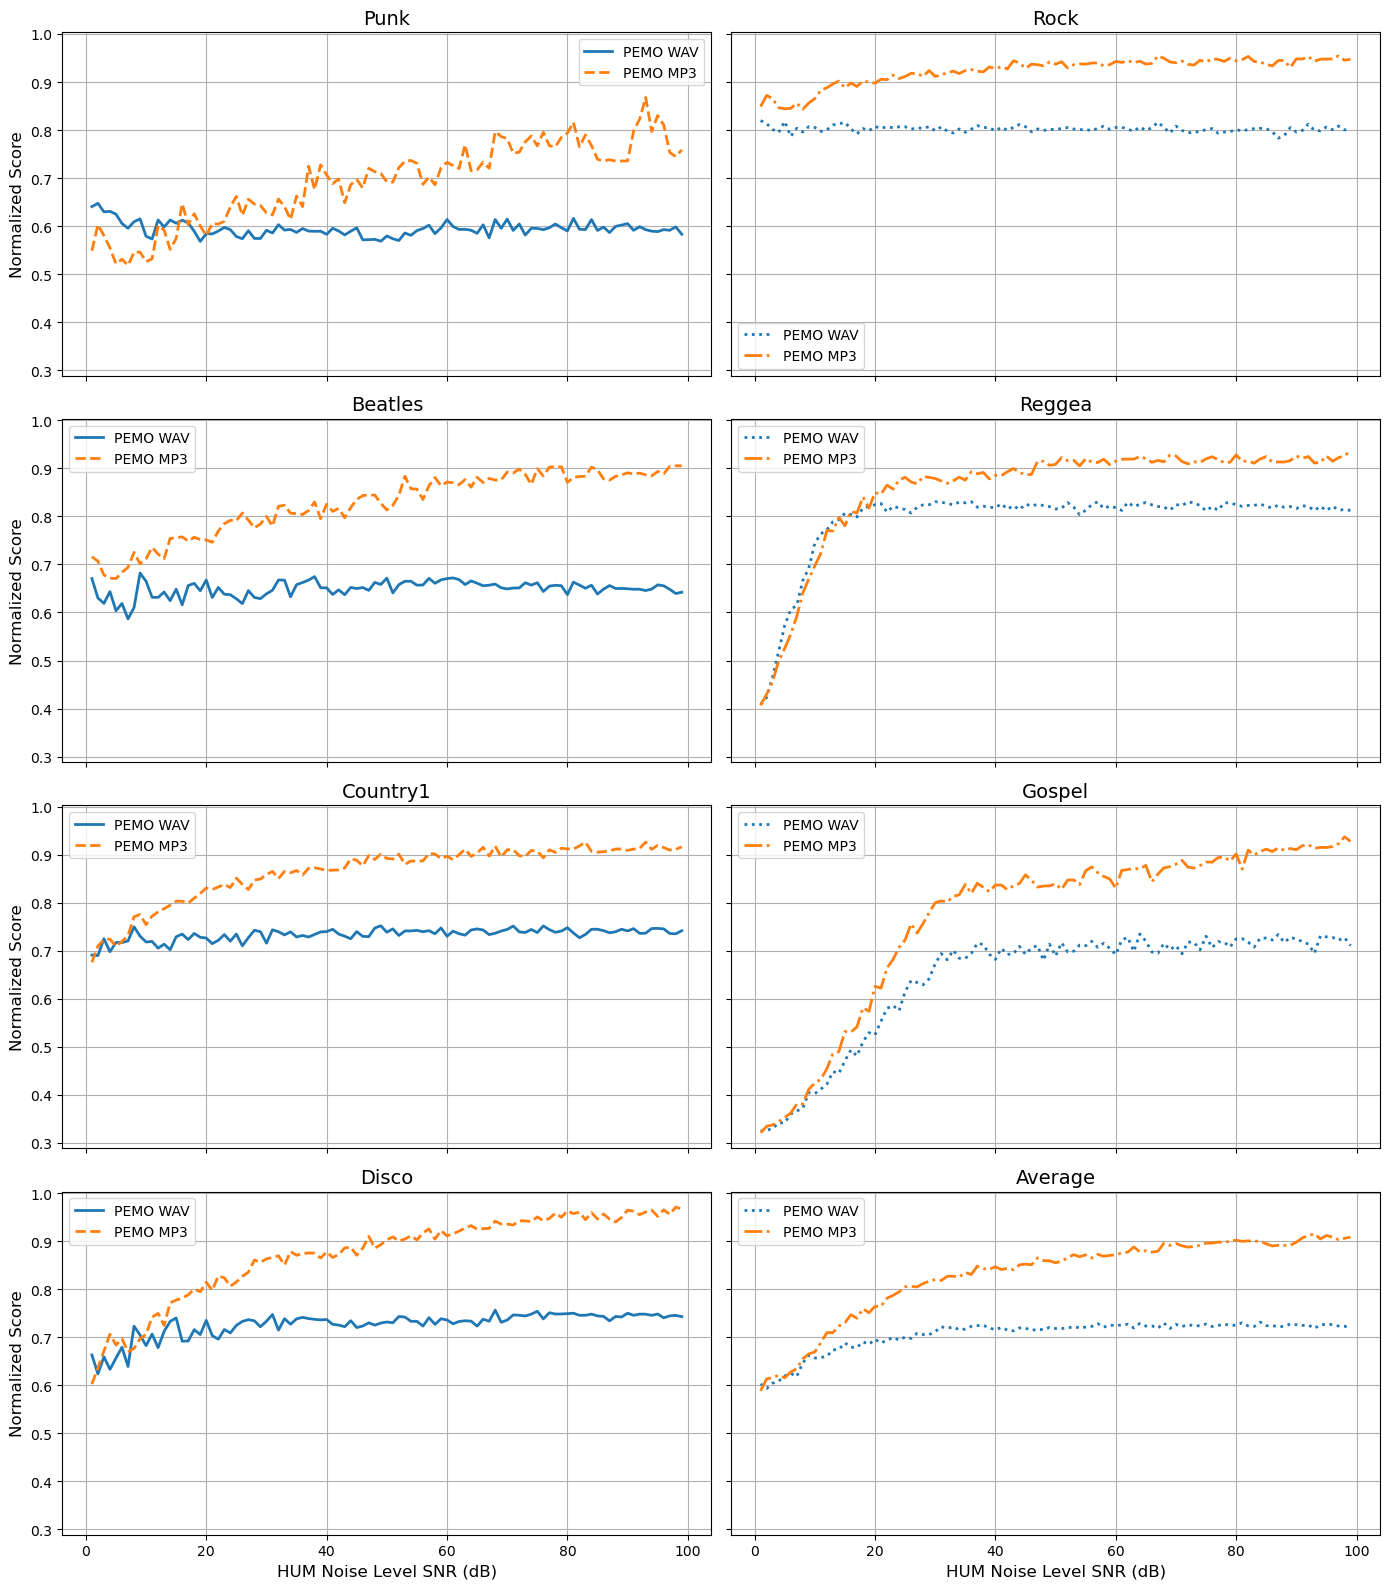

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import itertools

# 1) Discover all project folders
base_dir = Path('/home/codecrack/Jnotebook/48k_16bit')
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# 2) Load and normalize data for each project
data = []
for proj in projects:
    name = proj.name
    pemo_wav = pd.read_csv(proj/'pemo.csv', usecols=['Hum SNR','score']) \
                    .rename(columns={'score':'basic_score'})
    pemo_mp3 = pd.read_csv(proj/'pemo.csv', usecols=['Hum SNR.1','score.4']) \
                    .rename(columns={'Hum SNR.1':'Hum SNR','score.4':'basic_score'})

    pemo_wav['norm_score'] = (pemo_wav['basic_score'] + 4) / 4
    pemo_mp3['norm_score'] = (pemo_mp3['basic_score'] + 4) / 4

    data.append({
        'name': name,
        'pemo_wav': pemo_wav[['Hum SNR','norm_score']],
        'pemo_mp3':   pemo_mp3[['Hum SNR','norm_score']],
    })

# 3) Compute average curves across all projects
def average_curve(dfs, col):
    return pd.concat(dfs).groupby('Hum SNR', as_index=False)[col].mean()

avg_pemo_wav = average_curve([d['pemo_wav'] for d in data], 'norm_score')
avg_pemo_mp3   = average_curve([d['pemo_mp3']   for d in data], 'norm_score')

data.append({
    'name': 'Average',
    'pemo_wav': avg_pemo_wav,
    'pemo_mp3':   avg_pemo_mp3,
})

# 4) Plotting: 4x2 grid of subplots
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharex=True, sharey=True)
styles = itertools.cycle(['-','--'])

# Flatten axes for easy iteration
flat_axes = axes.flatten()

for ax, proj in zip(flat_axes, data):
    ax.plot(proj['pemo_wav']['Hum SNR'], proj['pemo_wav']['norm_score'], label='PEMO WAV', linestyle=next(styles), linewidth=2)
    ax.plot(proj['pemo_mp3']['Hum SNR'],   proj['pemo_mp3']['norm_score'],     label='PEMO MP3',   linestyle=next(styles), linewidth=2)
    ax.set_title(proj['name'], fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=10)

# Disable unused subplots if any
for ax in flat_axes[len(data):]:
    ax.axis('off')

# Shared Y-label for first column
for r in range(rows):
    axes[r][0].set_ylabel('Normalized Score', fontsize=12)
# Shared X-label for bottom row
for c in range(cols):
    axes[rows-1][c].set_xlabel('HUM Noise Level SNR (dB)', fontsize=12)

plt.tight_layout()
plt.show()
